In [1]:
import pyclesperanto_prototype as cle
from numpy import random
from skimage.io import imshow

# Get a test label image

In [2]:
pointlist = cle.push_zyx(random.random((2,25)) * 100) 
print(pointlist)

[[97.26905    68.41985    78.58907    10.203156    0.54742193 65.74997
   6.300302   63.416096   86.59691    46.986897   25.293264   95.149925
   9.654409   52.0624     32.74636    14.6792     20.224514   26.347742
  36.98292    97.332634   96.89198    66.02977    60.487648   16.696682
  20.914415  ]
 [39.854412   90.12031    54.563904   94.54553    17.214573   37.999496
  54.98005     2.1940935  47.94401    16.409565   61.331486   18.102142
  79.788475   29.678013   92.34989    13.899443   61.595856   29.51073
  69.80327    45.29358    17.909653   94.327995   15.322577   64.93382
  59.13818   ]]


c:\users\rober\miniconda3\lib\site-packages\pyopencl\__init__.py:252: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  warn("Non-empty compiler output encountered. Set the "
c:\users\rober\miniconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
c:\users\rober\miniconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


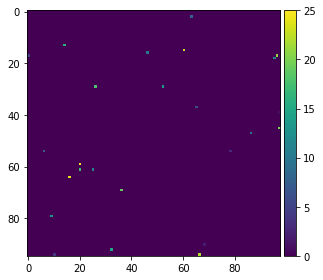

In [3]:
labelled_spots = cle.pointlist_to_labelled_spots(pointlist)
imshow(cle.pull_zyx(labelled_spots))

c:\users\rober\miniconda3\lib\site-packages\pyopencl\__init__.py:252: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  warn("Non-empty compiler output encountered. Set the "


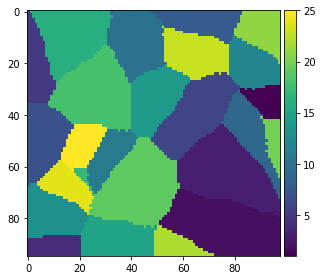

In [4]:
cells = cle.extend_labeling_via_voronoi(labelled_spots)
imshow(cle.pull_zyx(cells))

# Analyze and visualize distances between labelled objects

In [5]:
centroids = cle.label_centroids_to_pointlist(cells)
print(centroids)

[[91.521126  75.48247   76.689224  10.277778   3.6370656 64.507614
   6.3589745 67.09342   85.91077   41.86076   31.269388  86.51667
   9.316239  48.908234  34.00529   16.73091   21.37037   25.925072
  42.616993  94.78704   90.016     56.630573  64.47494   14.897675
  20.971292 ]
 [34.373238  82.964935  62.453632  90.62963   21.19305   39.83418
  49.505127   4.204152  47.375385  11.6118145 55.9551    21.046667
  78.535614  33.811764  87.69312    9.854546  64.03704   31.5951
  67.87451   50.555557   7.396     90.171974  16.506596  67.40465
  51.588516 ]]


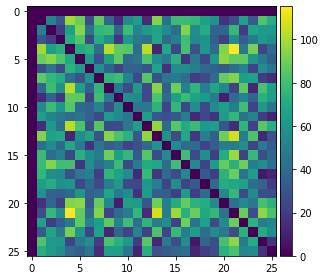

In [6]:
distance_matrix = cle.generate_distance_matrix(centroids, centroids)
imshow(cle.pull_zyx(distance_matrix))

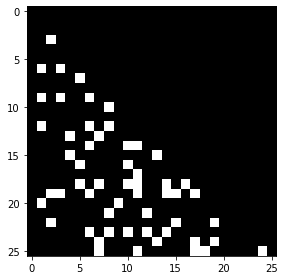

In [7]:
touch_matrix = cle.generate_touch_matrix(cells)
imshow(cle.pull_zyx(touch_matrix))

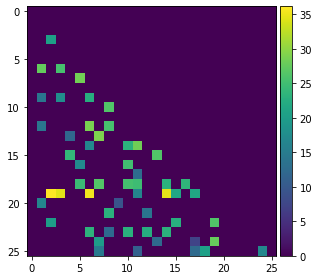

In [8]:
touch_distance_matrix = cle.multiply_images(touch_matrix, distance_matrix)
imshow(cle.pull_zyx(touch_distance_matrix))

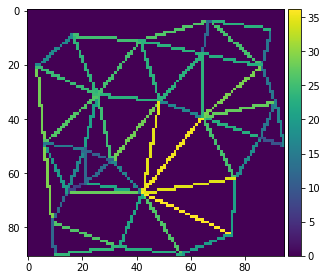

In [9]:
distance_mesh = cle.touch_matrix_to_mesh(centroids, touch_distance_matrix)
imshow(cle.pull_zyx(distance_mesh))

# Sepcial meshes
## Mesh nearest neighbors

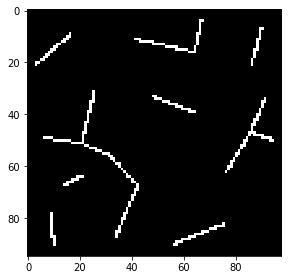

In [10]:
nearest_neighbor_mesh = cle.draw_mesh_between_n_closest_labels(cells, n=1)
imshow(cle.pull_zyx(nearest_neighbor_mesh))

## Meshes of proximal neighbors/

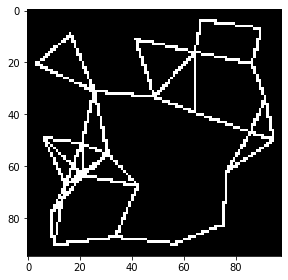

In [13]:
close_neighbors_mesh = cle.draw_mesh_between_proximal_labels(cells, maximum_distance=25)
imshow(cle.pull_zyx(close_neighbors_mesh))

## Distance meshes
This is the same custom mesh as shown in the section on top

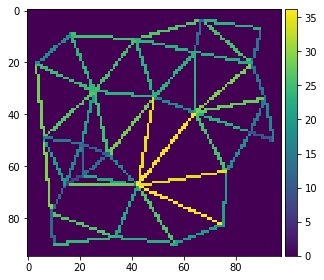

In [14]:
distance_mesh = cle.draw_distance_mesh_between_touching_labels(cells)
imshow(cle.pull_zyx(distance_mesh))